# 회귀진단 실습

## 회귀진단

1. 모형: $y=\beta_0 + \beta_1x_1 + \beta_2x_2 + \epsilon, \epsilon\sim N(0,\sigma^2) \text{ indep }$

2. 유의성검정

- 모형: $H_0: \beta_1 = \beta_2 = 0 \quad (F)$
- 회귀계수: $H_0:\beta_1=0, H_0:\beta_2=0 \quad (t)$

3. 적합도: $R^2, R^2_{Adj}, \sqrt{MSE} = RMSE$ : 비교

4. 회귀진단

- (1) 잔차분석 (모형에 대한 가정 검토)  <font color='red'> --  $e_i = y_i -\hat{y}_i$ </font>

- (2) 적절한 모형의 선택 <font color='red'>  -- 변수변환,$\log, x^2, \dots,$ 변수선택</font>

- (3) 독립변수들간의 상관관계 검토  <font color='red'>-- 다중공선성 (multi-co-linearity)</font>

- (4) 지렛대점(leverage point)의 검출

- (5) 이상치(outlier) 확인

- (6) 영향점(influential observation)의 검출

오차항의 가정검토 (잔차분석)

잔차라고 하는 것은 여러가지 의미를 갖는다. 잔차라고 하는 것은 우리가 설정한 모형에서 오차항에 대한 가정을 보는 것인데 오차는 실제 관측할 수 없는 값을 의미하기 때문에 오차 대신에 잔차를 이용해서 잔차가 마치 오차인 것 처럼 가정 검토를 하는 것이다.

잔차는 $\text{실제값}-\text{예측값}$인데 이 잔차를 ($e_i = y_i-\hat{y}_i$) 오차항에 대략적으로 대한 추정값($\hat{\epsilon}_i$)이라고 생각할 수 있다.

따라서 $\epsilon\sim N(0,\sigma^2) \text{ indep }$ 라고 했으니 이를 검토하기 위해 잔차($e_1, e_2,\dots e_n)$을 사용하는 것

## 가변수

### Example

In [1]:
library(ggplot2)

In [2]:
dt <- data.frame(
  y = c(17,26,21,30,22,1,12,19,4,16,
        28,15,11,38,31,21,20,13,30,14),
  x1 = c(151,92,175,31,104,277,210,120,290,238,
         164,272,295,68,85,224,166,305,124,246),
  x2 = rep(c('M','F'), each=10)
)

head(dt)

,y,x1,x2
,<dbl>,<dbl>,<chr>
1,17,151,M
2,26,92,M
3,21,175,M
4,30,31,M
5,22,104,M
6,1,277,M


In [3]:
contrasts(factor(dt$x2))

,M
F,0
M,1


### 생각

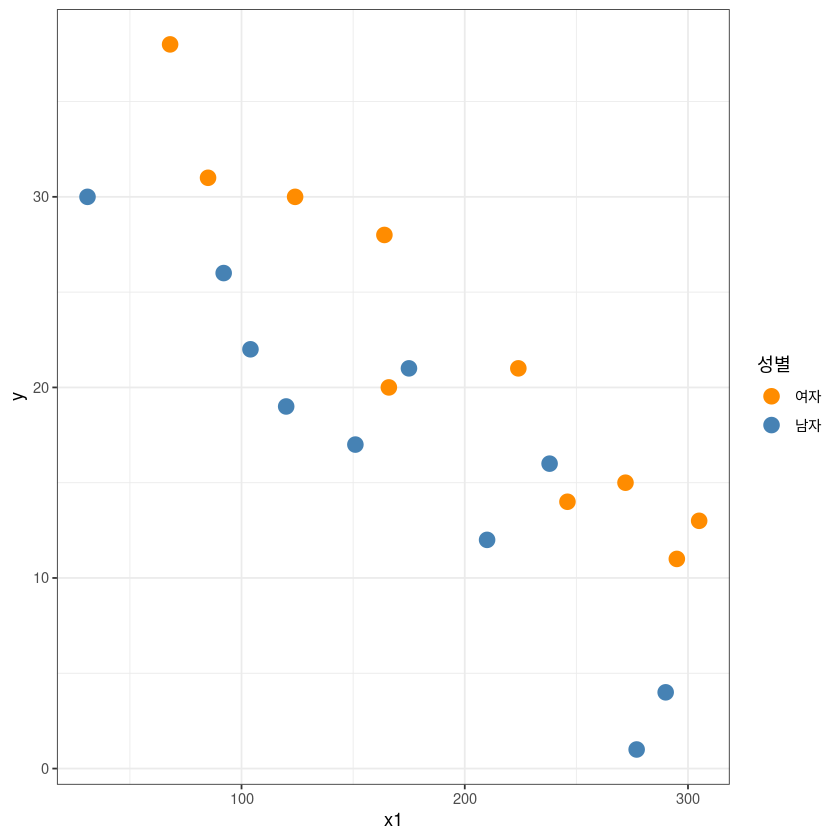

In [26]:
ggplot(dt, aes(x1, y, col=x2)) + 
  geom_point(size=4) + 
  # geom_text(label=rownames(dt)) +
  theme_bw() +
  guides(col=guide_legend(title='성별')) +
  scale_color_manual(labels=c('여자','남자'),
                     values = c('darkorange', 'steelblue'))

- 교호작용 없이 가변수를 모델에 넣어줘야겠다고 생각해볼 수 있다.

### Model1 : $y=\beta_0 + \beta_1x_1 + \epsilon$

범주형 변수($x_2)$ 즉, 성별구분 없이 모형적합.

In [9]:
model_1 <- lm(y~x1, dt)
summary(model_1)


Call:
lm(formula = y ~ x1, data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-9.579 -4.737  0.721  4.224  7.936 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.40361    2.78580  13.068 1.26e-10 ***
x1          -0.09323    0.01396  -6.677 2.91e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.124 on 18 degrees of freedom
Multiple R-squared:  0.7124,	Adjusted R-squared:  0.6964 
F-statistic: 44.58 on 1 and 18 DF,  p-value: 2.906e-06


- 모형자체는 상당히 유의하고, $MSE, R^2$ 확인

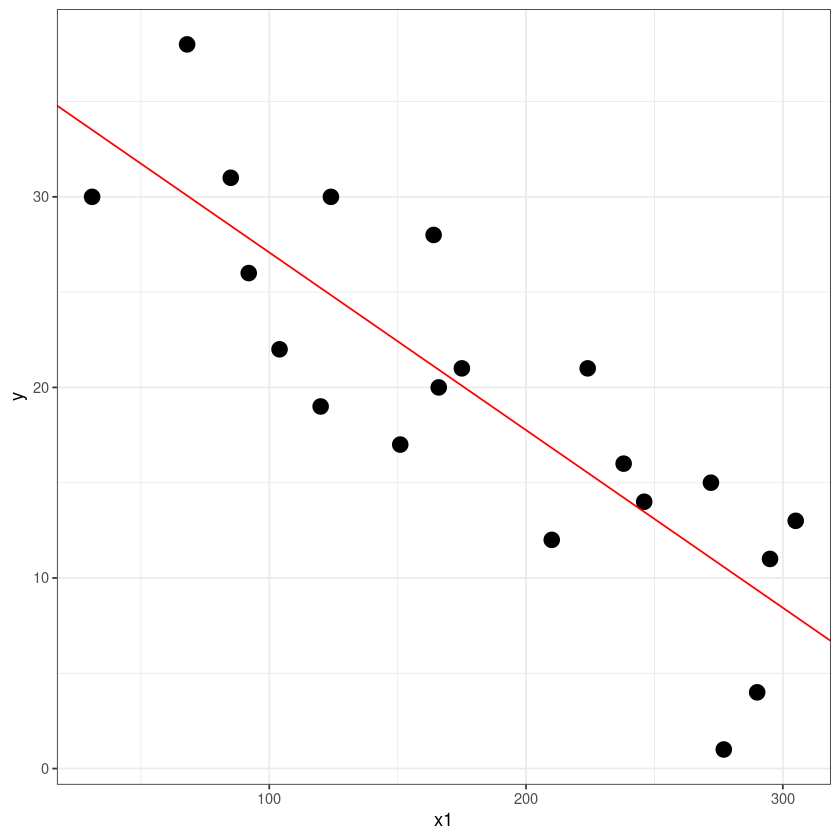

In [27]:
ggplot(dt, aes(x1, y)) + 
  geom_point(size=4) + 
  geom_abline(slope = coef(model_1)[2], 
              intercept = coef(model_1)[1], col= 'red')+
  theme_bw()

$\hat{y} = 36.40-0.0932x_1$

- 평균적으로 $x=0$이라면 $36.40$ 시간이 걸린다.
- 시험성적이 1점 올라갈때마다 $0.09$ 시간정도 감소한다.

### Model2: $y=\beta_0 + \beta_1x_1 + \beta_2x_2 + \epsilon$

$\begin{cases}  
x_2=0 & \text{if F} \text{ (BASE)}\\
x_2 = 1 & \text{if M}
\end{cases}$

$E(y|F): \beta_0 + \beta_1x_1$

$E(y|M): \beta_0 + \beta_1x_2 + \beta_2 = (\beta_0 + \beta_2) + \beta_1x_1$ 

$\begin{align*}\Rightarrow\beta_2 &= E(y|M) - E(y|F) \\
&= \beta_0 + \beta_2 + \beta_1x_1 - \{ \beta_0 + \beta_1x_1\} \\
&= \text{시험(적성검사)성적이 동일할 때 여자와 남자의 소요시간 평균의 차이}\end{align*}$

In [28]:
# 뭐가 0이고 1??
contrasts(factor(dt$x2))

,M
F,0
M,1


- `contrast`: factor로 인식이 됐을 때 뭐가 0이고 뭐가 1인지 알려줌
- 교재와는 달리 $F$가 $0$, $M$이 $1$임을 주의하자.
- 해당 경우 $0$이 베이스이므로 여자가 베이스!!
- 실제모형적합시 $x_2$ 그대로 넣어주면 된다. 자연스럽게 팩터형 변수로 바뀜.

In [29]:
model_2 <- lm(y~x1 + x2, dt)
summary(model_2)


Call:
lm(formula = y ~ x1 + x2, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0165 -1.7450 -0.6055  1.8803  6.1835 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.768865   1.948930  21.432 9.64e-14 ***
x1          -0.100918   0.008621 -11.707 1.47e-09 ***
x2M         -7.933953   1.414702  -5.608 3.13e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.123 on 17 degrees of freedom
Multiple R-squared:  0.8991,	Adjusted R-squared:  0.8872 
F-statistic: 75.72 on 2 and 17 DF,  p-value: 3.42e-09


- 가설 : $\beta_1=\beta_2 = 0$ $\to \text{p-value}=3.42e-09$로 유의
- $R^2, R^2_{Adj}$ 이전 모델1에 비해 매우 증가 ($0.2$ 정도 증가)
- $RMSE$ 도 매우 감소
- `x2M` : 남자그룹의 회귀계수가 $-7.933953$을 의미한다. (즉, $F=0, M=1$)
    - $\hat{\beta}_2=-0.7933953$ (base가 바뀌었으므로 교재와 부호가 다른것은 당연)
    - 적성검사 성적이 동일하다면 여자(base)보다 남자가 습득하는데 걸리는 시간이 $7.93$ 시간만큼 적게 걸린다.

$\to$ $x_2$라는 변수가 들어가면서 적합력이 매우 좋아짐을 알 수 있고 개별회귀계수에 대해서도 매우 유의함을 알 수 있다.

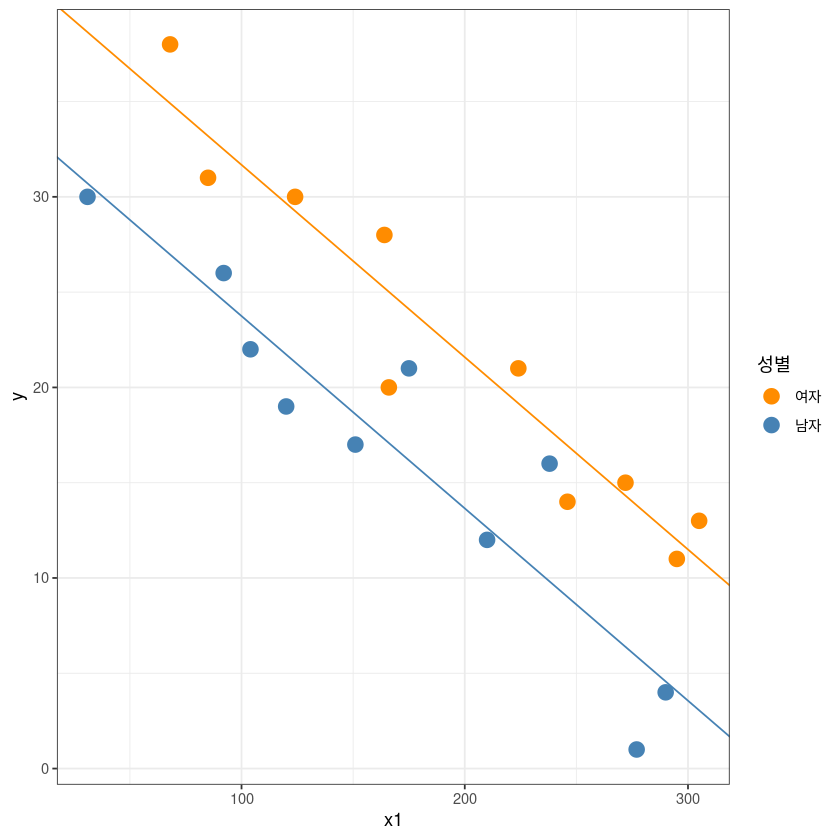

In [37]:
ggplot(dt, aes(x1, y, col=x2)) + 
  geom_point(size=4) + 
  theme_bw() + 
  ## Female
  geom_abline(slope = coef(model_2)[2],  # beta1
              intercept = coef(model_2)[1], col= 'darkorange')+ ## beta0
  ## Male
  geom_abline(slope = coef(model_2)[2],  # beta1
              intercept = coef(model_2)[1]+coef(model_2)[3], col= 'steelblue')+ ## beta0 + beta3
  guides(col=guide_legend(title="성별")) +
  scale_color_manual(labels = c("여자", "남자"), values = c("darkorange", "steelblue"))


In [34]:
coef(model_2)

(Intercept)          x1         x2M 
 41.7688646  -0.1009177  -7.9339526

### 적성검사 성적이 동일할 때 남성과 여성의 평균시간차이가 있는가? (양측)

$H_0: \beta_2=0 \text{ vs. } H_1: \beta_2 \neq 0$

In [40]:
summary(model_2)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),41.7688646,1.948929636,21.431694,9.640000e-14
x1,-0.1009177,0.008620641,-11.706522,1.468240e-09
x2M,-7.9339526,1.414702366,-5.608213,3.134533e-05


- `x2M`의 p-value(양측검정에 대한 유의확률 값)가 아주 작기때문에 $\beta_2$가 유의하다고 할 수 있다.

- $\text{Std.Error} = \widehat{\text{s.e}}(\hat{\beta}_2)$
- $t=\frac{\hat{\beta}_2}{\widehat{\text{s.e}}(\hat{\beta}_2)}$

### 적성검사 성적이 동일할 때 남성이 여성보다 평균적으로 시간이 더 적게 걸릴까? (단측)

$H_0: \beta_2=0 \text{ vs. } H_1: \beta_2 < 0$

단측검정에 대한 유의확률값은 양측검정읠 p-value의 값을 2로 나눠준 값이다.

In [44]:
cat('p-value=', 3.134533e-05/2)

p-value= 1.567267e-05

따라서 남성이 여성보다 평균시간이 더 적게 걸린다.

### Partial F-test (RM vs. FM)

RM: model_1

FM: model_2

In [45]:
anova(model_1, model_2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18,472.5913,NA,NA,NA,NA
2,17,165.8145,1,306.7768,31.45206,3.134533e-05


- $RSS$ : $SSE$라고 생각

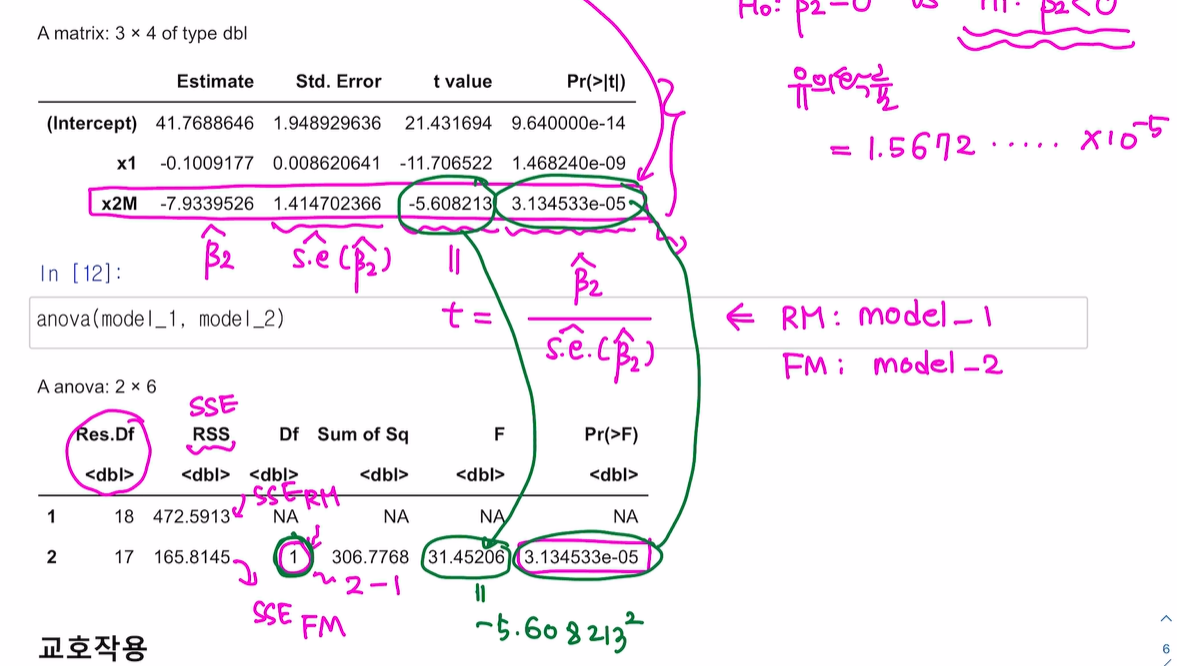

- 자유도가 $1$일 때 t분포의 유의확률과 $F$분포의 유의확률은 동일, t통계량을 제곱하면 F통계량이 된다.

## 교호작용

$y=\beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_1x_2 + \epsilon$

$\begin{cases}  
x_2=0 & \text{if F} \text{ (BASE)}\\
x_2 = 1 & \text{if M}
\end{cases}$

$E(y|F): \beta_0 + \beta_1x_1 \\
E(y|M): \beta_0 + \beta_1x_2 + \beta_2 = (\beta_0 + \beta_2) + (\beta_1+\beta_3)x_1$

In [47]:
model_3 <- lm(y~x1*x2, dt) # lm(y~x1+x2+x1:x2, dt)
summary(model_3)


Call:
lm(formula = y ~ x1 * x2, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0463 -1.7591 -0.6232  1.9311  6.1102 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.969620   2.635580  15.924 3.11e-11 ***
x1          -0.101948   0.012474  -8.173 4.20e-07 ***
x2M         -8.313516   3.541379  -2.348   0.0321 *  
x1:x2M       0.002089   0.017766   0.118   0.9078    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.218 on 16 degrees of freedom
Multiple R-squared:  0.8992,	Adjusted R-squared:  0.8803 
F-statistic: 47.56 on 3 and 16 DF,  p-value: 3.405e-08


- 모형 자체 유의
- $\beta_3$ 즉, 교호작용 텀을 추가하였지만 $R^2_{Adj}$는 오히려 감소 ($R^2_{Adj}: 0.8872(\beta_1, \beta_2)\to 0.8803(\beta_1,\beta_2, \beta_3)$)
- $RMSE$ 역시 약간 증가. ($3.123 \to 3.218$)
- $\beta_3$를 넣었어도 모형이 좋아지지 않네? $\to$ 실제로 $\beta_3$의 회귀계수가 유의하지 않다고 나왔다. (통계적으로 유의하지 X)

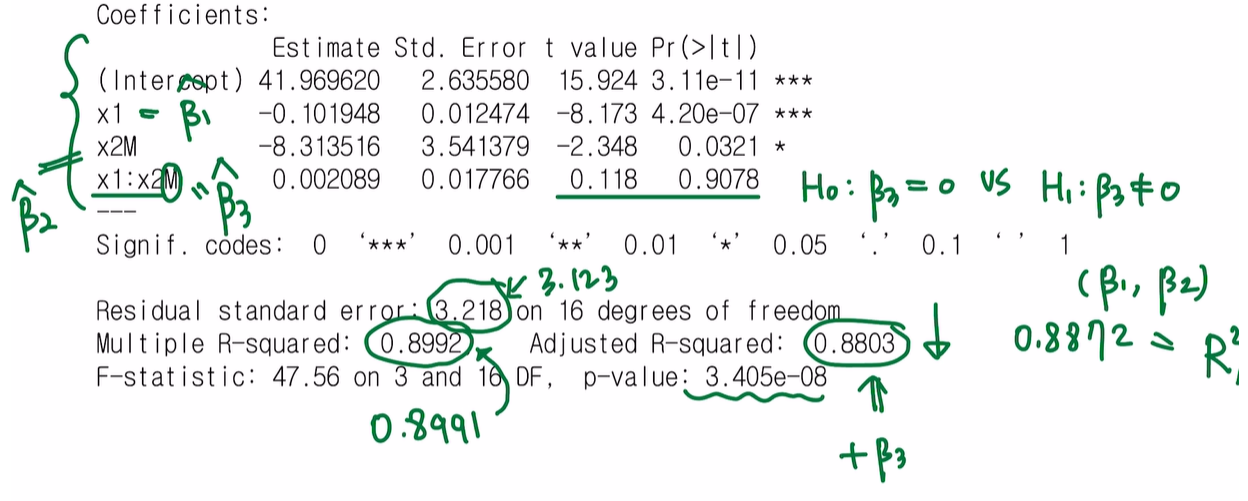

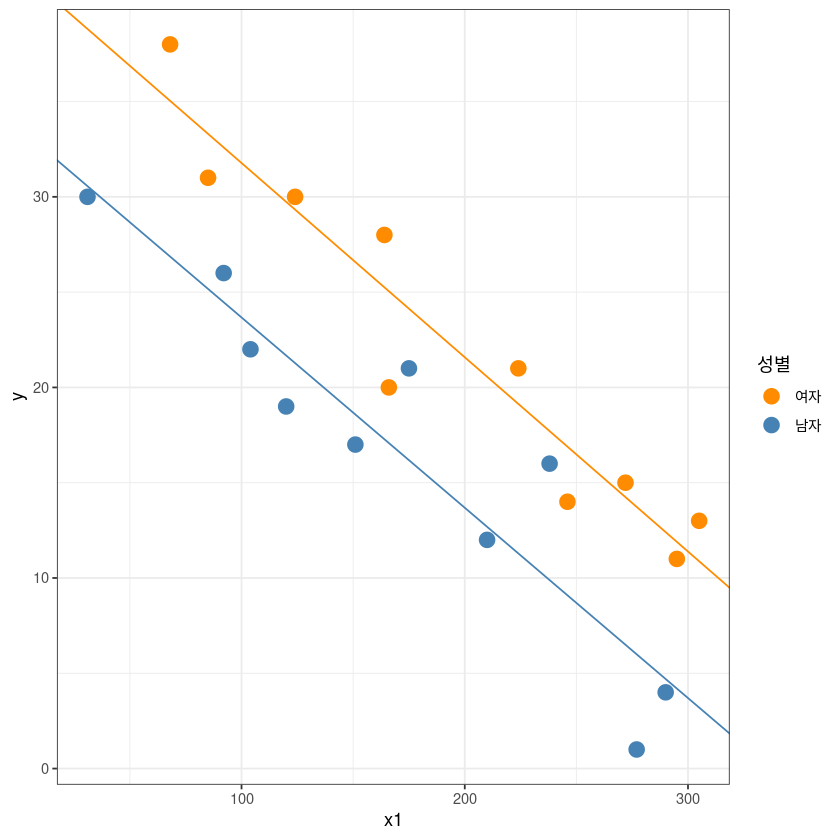

In [50]:
## y = b0 + b1x1 + b2x2 + b3x1x2
## M : x2=0 => E(y|M) = b0+b1x1
## F : x2=1 => E(y|F) = b0 + b1x1 + b2 + b3x1 
##                    = (b0+b2) + (b1+b3)x1

ggplot(dt, aes(x1, y, col=x2)) + 
  geom_point(size=4) + 
  theme_bw() + 
  geom_abline(slope = coef(model_3)[2], 
              intercept = coef(model_3)[1], col= 'darkorange')+
  geom_abline(slope = coef(model_3)[2]+coef(model_3)[4], 
              intercept = coef(model_3)[1]+coef(model_3)[3], col= 'steelblue')+
  guides(col=guide_legend(title="성별")) +
  scale_color_manual(labels = c("여자", "남자"), values = c("darkorange", "steelblue"))

### 가설검정1

$H_0: \beta_3=0 \text{ vs. } H_1: \beta_3 \neq 0$

In [52]:
summary(model_3)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),41.96961960,2.63558045,15.9242415,3.106803e-11
x1,-0.10194777,0.01247420,-8.1726893,4.198832e-07
x2M,-8.31351564,3.54137909,-2.3475362,3.209176e-02
x1:x2M,0.00208933,0.01776597,0.1176029,9.078460e-01


`-` Partial F-test

$H_0: \beta_3=0 \text{ vs. } H_1: \beta_3 \neq 0$

In [54]:
anova(model_2, model_3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17,165.8145,NA,NA,NA,NA
2,16,165.6713,1,0.1432067,0.01383045,0.907846


- Partial F-test 결과도 위와 같다.

### 가설검정2

$H_0: \beta_2=\beta_3=0 \text{ vs. } H_1: \text{not } H_1 \neq 0$

- $RM:$ model_1 $(x_1)$
- $FM:$ model_3 $(x_1*x_2)$


`-` Partial F-test

In [55]:
anova(model_1, model_3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18,472.5913,NA,NA,NA,NA
2,16,165.6713,2,306.92,14.82068,0.0002280824


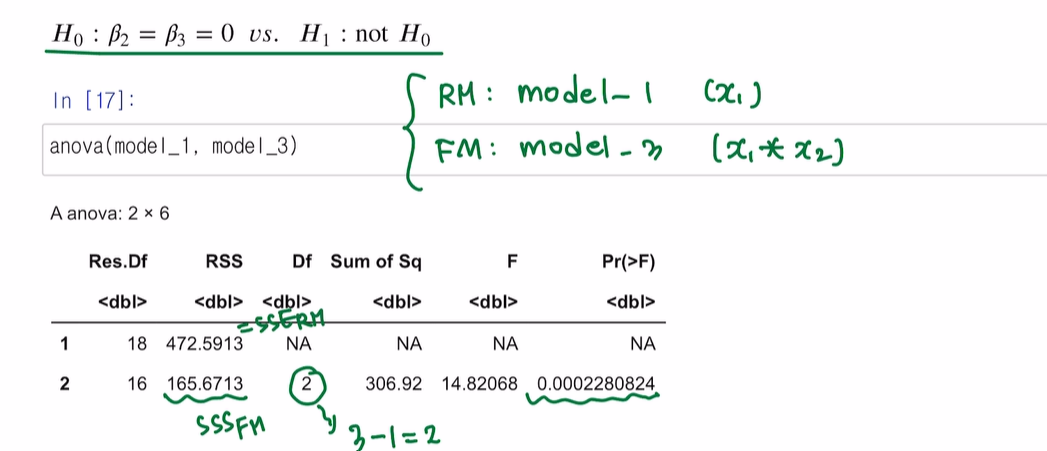

## 가변수가 아닌, one-hot encoding

In [56]:
dt2 <- data.frame(y = dt$y,
                  x1 = dt$x1,
                  x2 = as.numeric(dt$x2=='M'),
                  x3 = as.numeric(dt$x2=='F'))

dt2

y,x1,x2,x3
<dbl>,<dbl>,<dbl>,<dbl>
17,151,1,0
26,92,1,0
21,175,1,0
30,31,1,0
22,104,1,0
1,277,1,0
12,210,1,0
19,120,1,0
4,290,1,0


### Model4: $y=\beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \epsilon$ (잘못된 예시)

$\beta_0$와 $\beta_2x_2 + \beta_2x_2$ 가 linearly independent하지 않아서 rank가 줄어들기 때문에 LSE를 구할 수 없게 된다. $(1 = x_2 + x_3)$

아래의 표에서 확인할 수 있듯이 $x3$에 대한 LSE 값이 구해지지 않았다. (Full rank가 아니기 때문에 구해지지 않는다.)

In [57]:
model_4 <- lm(y~ ., dt2)
summary(model_4)


Call:
lm(formula = y ~ ., data = dt2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0165 -1.7450 -0.6055  1.8803  6.1835 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.768865   1.948930  21.432 9.64e-14 ***
x1          -0.100918   0.008621 -11.707 1.47e-09 ***
x2          -7.933953   1.414702  -5.608 3.13e-05 ***
x3                 NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.123 on 17 degrees of freedom
Multiple R-squared:  0.8991,	Adjusted R-squared:  0.8872 
F-statistic: 75.72 on 2 and 17 DF,  p-value: 3.42e-09


### Model5: 그래도 원-핫인코딩 하고 싶다면?

- 절편, $x_2, x_3$ 중 하나를 날리면 된다.

#### Model5: $  y= \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \epsilon$

$\begin{cases} x_2=\begin{cases}1 & M\\ 0 & F \end{cases} \\ x_3=\begin{cases} 0 & M\\ 1 & F\end{cases}\end{cases}$

$E(y|M) = \beta_1x_1 + \beta_2$

$E(y|F) = \beta_1x_1 + \beta_3$

기울기는 동일한데 절편이 $\beta_2, \beta_3$ 이렇게 차이가 나는 것이다.

앞에서 썼던 절편이 있는 모형으로 친다면 $E(y|M) = (\beta_0 + \beta_2) + \beta_1x_1$ 이고, $\beta_2 = \beta_0+\beta_2$ 라고 생각하면 된다.

In [58]:
model_5 <- lm(y~0+x1+x2+x3, dt2) ## 절편이 없는 모델.
summary(model_5)


Call:
lm(formula = y ~ 0 + x1 + x2 + x3, data = dt2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0165 -1.7450 -0.6055  1.8803  6.1835 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
x1 -0.100918   0.008621  -11.71 1.47e-09 ***
x2 33.834912   1.758659   19.24 5.64e-13 ***
x3 41.768865   1.948930   21.43 9.64e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.123 on 17 degrees of freedom
Multiple R-squared:  0.982,	Adjusted R-squared:  0.9788 
F-statistic:   309 on 3 and 17 DF,  p-value: 5.047e-15


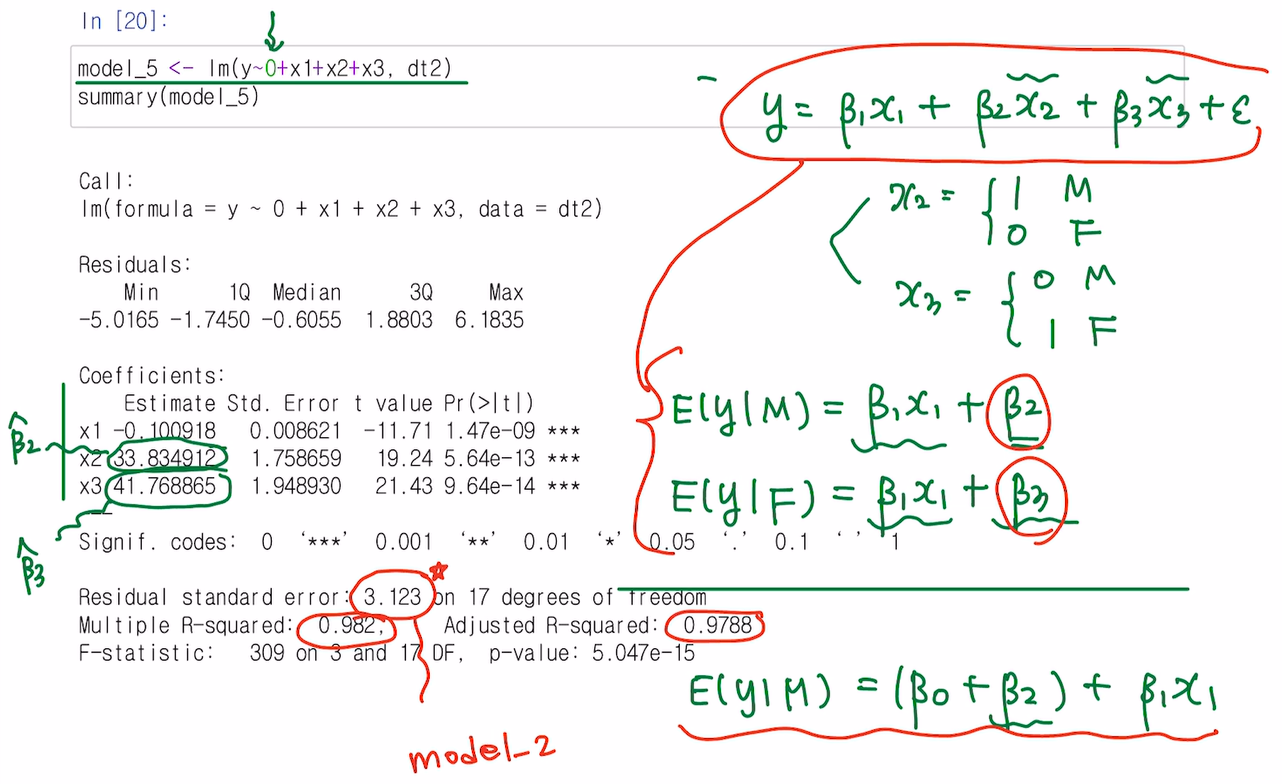

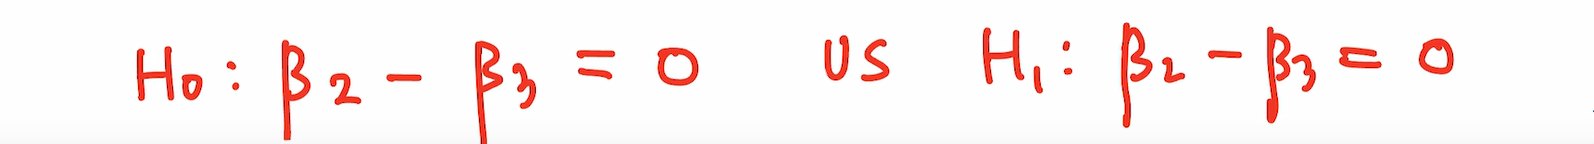

- 가변수를 사용하거나 절편을 없는 모델을 사용하는 방법이 있는데 절편이 없는 모형보다 가변수 사용을 추천(해석 측면에서 좋음)

## Carseats

In [61]:
library(ISLR)

head(Carseats)
dim(Carseats)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


[1] 400  11

• `Sales` : 판매량 (단위: 1,000)

• `Price` : 각 지점에서의 카시트 가격

• `ShelveLoc` : 진열대의 등급 (Bad, Medium, Good)

• `Urban` :도시 여부 (Yes, No)

• `US` : 미국 여부 (Yes, No)

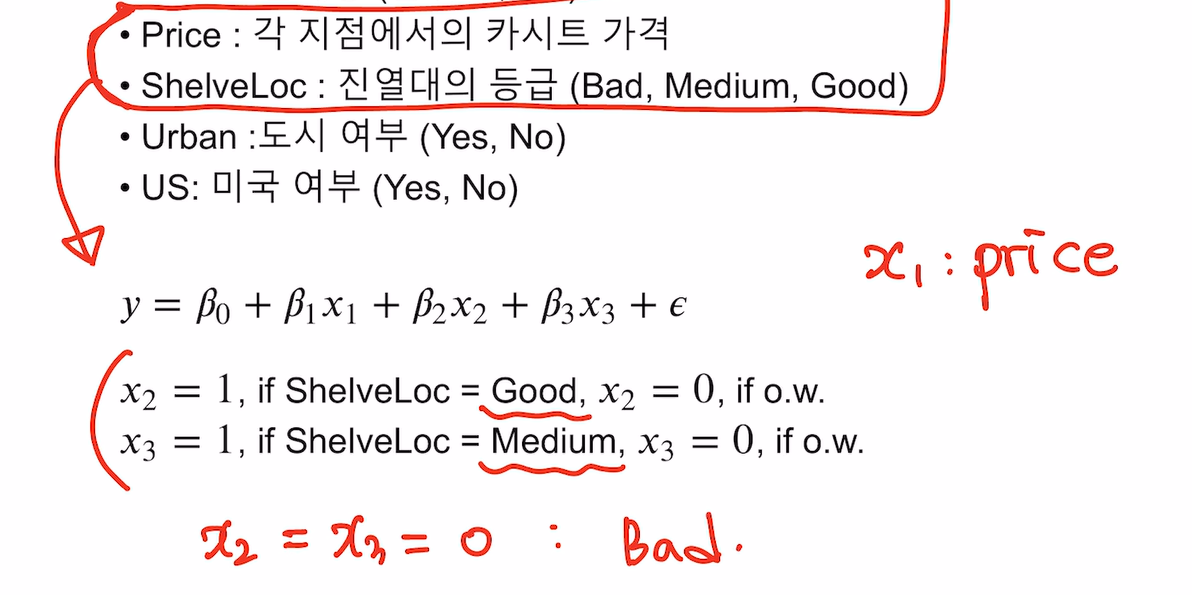

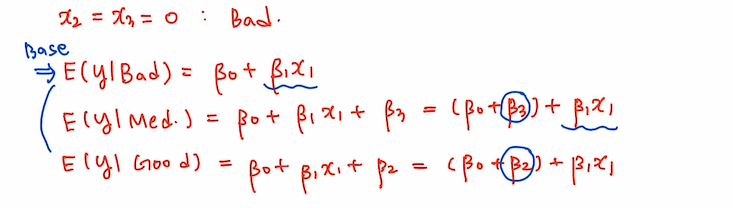

- 가격이 동일하다면 평균적인 판매량이 나쁜위치에 있는 카시트보다 좋은 위치에 있는 카시트가 $\beta_2$ 만큼 더 차이가 날 것이다.

- 가격이 동일하다면 평균적인 판매량이 나쁜위치에 있는 카시트보다 중간 위치에 있는 카시트가 $\beta_3$만큼 더 차이가 날 것이다.

In [62]:
fit <- lm(fit<-lm(Sales~Price+ShelveLoc, 
                  data=Carseats))
summary(fit)        


Call:
lm(formula = fit <- lm(Sales ~ Price + ShelveLoc, data = Carseats))

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8229 -1.3930 -0.0179  1.3868  5.0780 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     12.001802   0.503447  23.839  < 2e-16 ***
Price           -0.056698   0.004059 -13.967  < 2e-16 ***
ShelveLocGood    4.895848   0.285921  17.123  < 2e-16 ***
ShelveLocMedium  1.862022   0.234748   7.932 2.23e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.917 on 396 degrees of freedom
Multiple R-squared:  0.5426,	Adjusted R-squared:  0.5391 
F-statistic: 156.6 on 3 and 396 DF,  p-value: < 2.2e-16


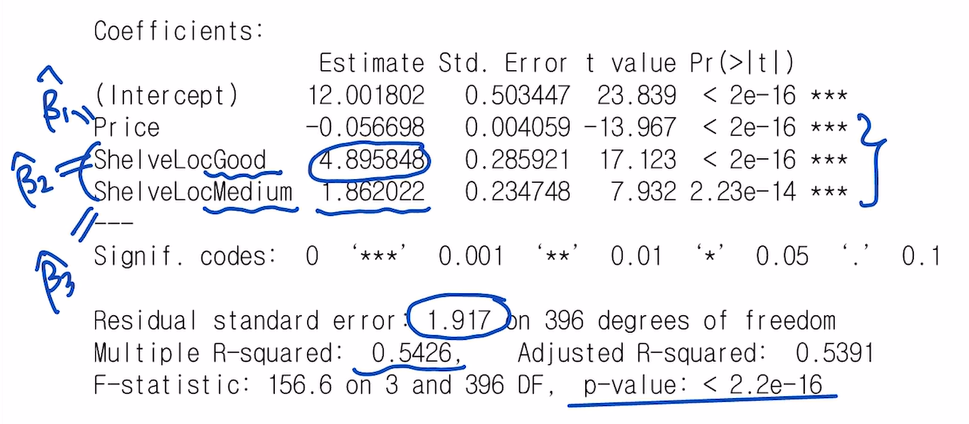

- 가격이 1만큼 높아지면 평균 판매량이 $0.056698$ 만큼 감소한다. (음의관계)

In [64]:
contrasts(Carseats$ShelveLoc) # Good(x2), Medium(x3)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


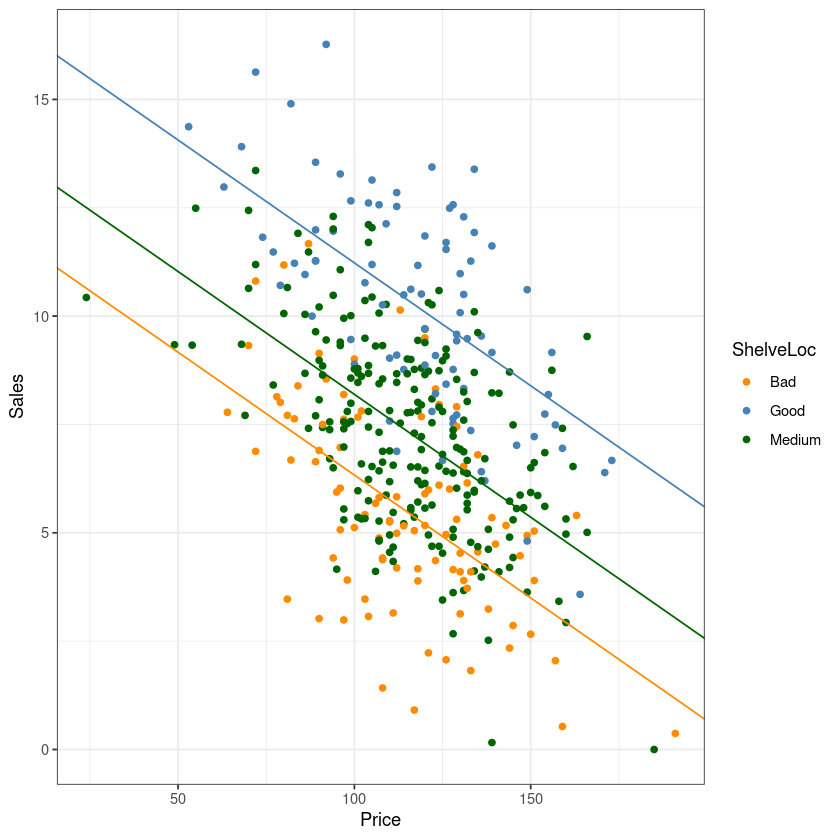

In [65]:
ggplot(Carseats, aes(Price, Sales, col=ShelveLoc)) + 
  geom_point() + 
  theme_bw() + 
  geom_abline(slope = coef(fit)[2], 
              intercept = coef(fit)[1], col= 'darkorange')+
  geom_abline(slope = coef(fit)[2], 
              intercept = coef(fit)[1]+coef(fit)[3], col= 'steelblue')+
  geom_abline(slope = coef(fit)[2], 
              intercept = coef(fit)[1]+coef(fit)[4], col= 'darkgreen')+
  guides(col=guide_legend(title="ShelveLoc")) +
  scale_color_manual(labels = c("Bad", "Good", "Medium"), 
                     values = c("darkorange", "steelblue","darkgreen"))

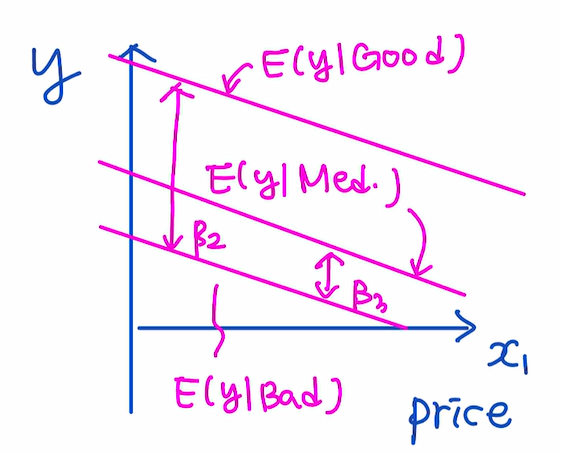

In [66]:
fit1 <- lm(Sales~Price+ShelveLoc+US, 
                  data=Carseats)
summary(fit1)        


Call:
lm(formula = Sales ~ Price + ShelveLoc + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1720 -1.2587 -0.0056  1.2815  4.7462 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     11.476347   0.498083  23.041  < 2e-16 ***
Price           -0.057825   0.003938 -14.683  < 2e-16 ***
ShelveLocGood    4.827167   0.277294  17.408  < 2e-16 ***
ShelveLocMedium  1.893360   0.227486   8.323 1.42e-15 ***
USYes            1.013071   0.195034   5.194 3.30e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.857 on 395 degrees of freedom
Multiple R-squared:  0.5718,	Adjusted R-squared:  0.5675 
F-statistic: 131.9 on 4 and 395 DF,  p-value: < 2.2e-16


### 구간별 회귀분석

In [67]:
dt <- data.frame(
  y = c(377,249,355,475,139,452,440,257),
  x1 = c(480,720,570,300,800,400,340,650)
)

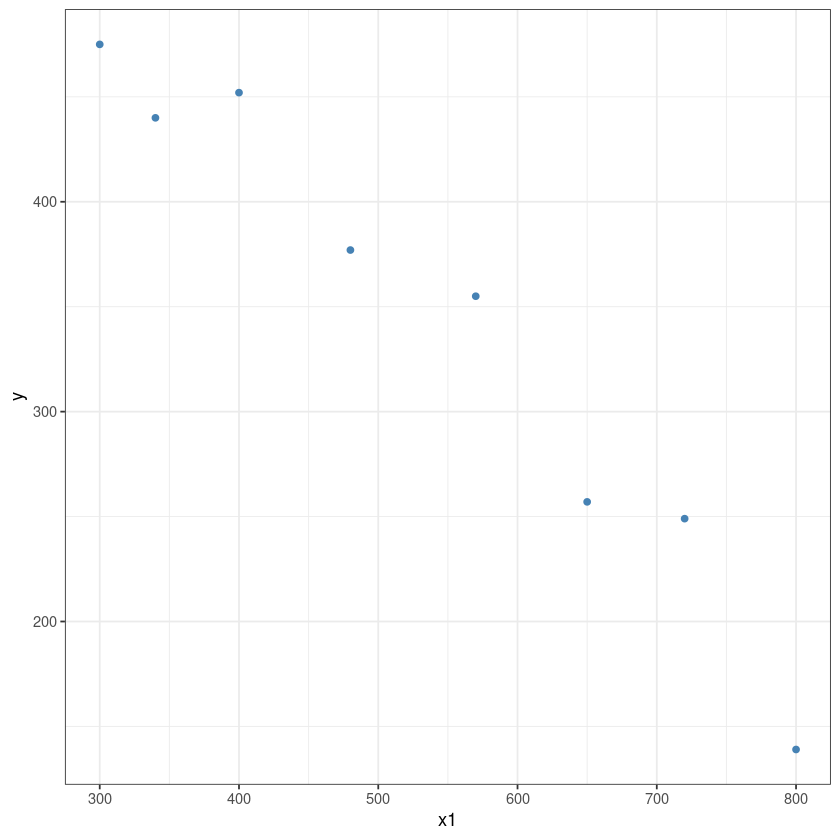

In [68]:
ggplot(data = dt, aes(x = x1, y = y)) + 
  geom_point(color='steelblue') + 
  theme_bw()

In [69]:
### threshould = 500
## x2(x1-xw)=x2(x1-500) = (x1 - 500)+ := x2

dt$x2 = sapply(dt$x1, function(x) max(0, x-500))

m <- lm(y ~ x1+x2, dt)
summary(m)


Call:
lm(formula = y ~ x1 + x2, data = dt)

Residuals:
      1       2       3       4       5       6       7       8 
-22.765  29.765  18.068   4.068 -17.463  20.605 -15.117 -17.160 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 589.5447    60.4213   9.757 0.000192 ***
x1           -0.3954     0.1492  -2.650 0.045432 *  
x2           -0.3893     0.2310  -1.685 0.152774    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.49 on 5 degrees of freedom
Multiple R-squared:  0.9693,	Adjusted R-squared:  0.9571 
F-statistic: 79.06 on 2 and 5 DF,  p-value: 0.0001645


In [70]:
dt2 <- rbind(dt[,2:3], c(500,0))
dt2$y <- predict(m, newdata = dt2)

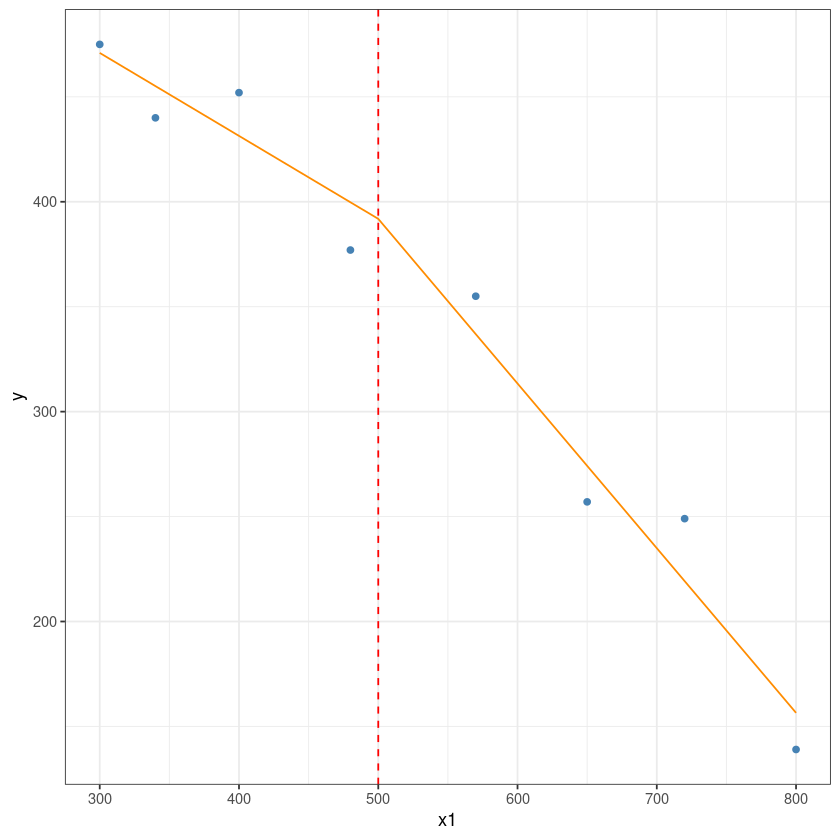

In [71]:
# this is the predicted line of multiple linear regression
ggplot(data = dt, aes(x = x1, y = y)) + 
  geom_point(color='steelblue') +
  geom_line(color='darkorange',
            data = dt2, aes(x=x1, y=y))+
  geom_vline(xintercept = 500, lty=2, col='red')+
  theme_bw()